# <b> active-pynference </b> : mazeX demo

Hello you ! This is a quick demo of the <b>active-pynference</b> / <b>actynf</b> package to simulate MDPs using Sophisticated Inference ! 
Buckle up buckaroo !


## 1. Introducing the task

To demonstrate the ability of the Sophisticated Inference agent to solve complex environments with numerous latent states, we will study a typical use case of the SI algorithm : the "soft maze".

Let's picture a grid made of a number of discrete cells :

DESCRIPTION OF THE SCHEME GOES HERE

On the next part of this tutorial , we'll see how to simulate various explorative behaviours using *active_pynference*.

## 2 . Using the package

### a. Install the package & import the needed packages 
<sup><sub><b> active-pynference </b> requires Python 3.x. and has been tested for Python 3.11 + but probably works well enough with slightly older versions.</sub></sup>

You can install the package by running :

```
    pip install active-pynference
```

You can find more complete documentation regarding the package installation in the installation_instructions.ipynb file.

Now that the package is successfully installed, let's explore what we can do with it !

In [1]:
# First, let's import stuff !
# Python "classics": 
import os
import numpy as np
import matplotlib.pyplot as plt


# Active Inference based packages :
import actynf # import active-pynference package
print("Imported active-pynference - version " + actynf.__version__)


FIGURES_SAVEPATH = os.path.join(".","local_resources","mazex","renders")

Imported active-pynference - version 0.1.37


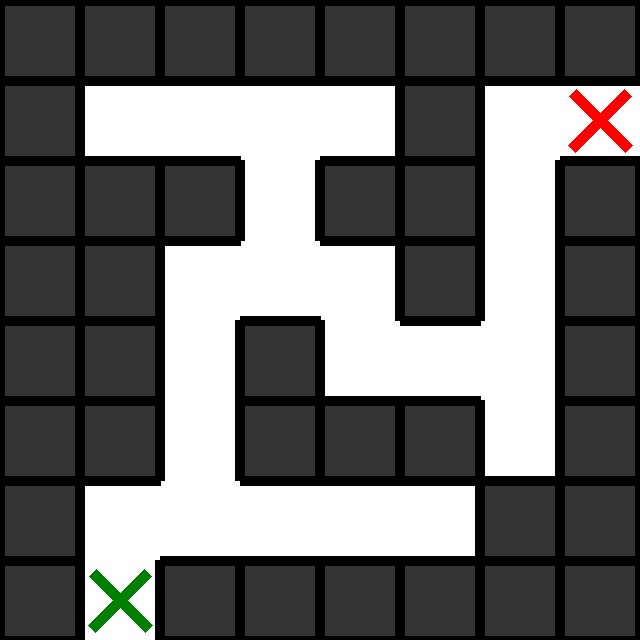

In [2]:
from local_demo_tools.mazex.weights import build_maze,build_maze_model
from local_demo_tools.mazex.plot import mazeplot


# from actynf.demo_tools.mazex.weights import build_maze,build_maze_model
# from actynf.demo_tools.mazex.weights import mazeplot

# This is the maze we're working with !
MAZE_ARRAY = np.array([
    [1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,1],
    [1,1,1,0,1,1,0,1],
    [1,1,0,0,0,1,0,1],
    [1,1,0,1,0,0,0,1],
    [1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,1,1]
])
MAZE_ARRAY = np.array([
    [1,1,1,1,1,1,1,1],
    [1,0,0,0,0,1,0,0],
    [1,1,1,0,1,1,0,1],
    [1,1,0,0,0,1,0,1],
    [1,1,0,1,0,0,0,1],
    [1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,1,1],
    [1,0,1,1,1,1,1,1]
])
START_IDX = (7,1)
END_IDX = (1,7)

# The traditional Active Inference 
# HMM associated with the maze below !
A,B,C,D,E,U = build_maze(MAZE_ARRAY,START_IDX,END_IDX)  

# Show the environment explored by the subject
maze_img = mazeplot(MAZE_ARRAY,START_IDX,END_IDX)
display(maze_img)

Above : the environment our agents will evolve in : 
- **The filled cells** are "adversive cells", the agents tries to avoid moving through them
- **The green cross** is the starting position of the agent
- **The red cross** is the goal of the agent. This preference can be encoded either through a preference only at this particular position (I highly value this specific spot but i don't value the spots directly next to it at all), or through a gradient of preferences based on the distance between each cell and this goal. To pick what kind of preference the subject starts with, you can use the *dirac_goal* boolean parameter in the model building function !

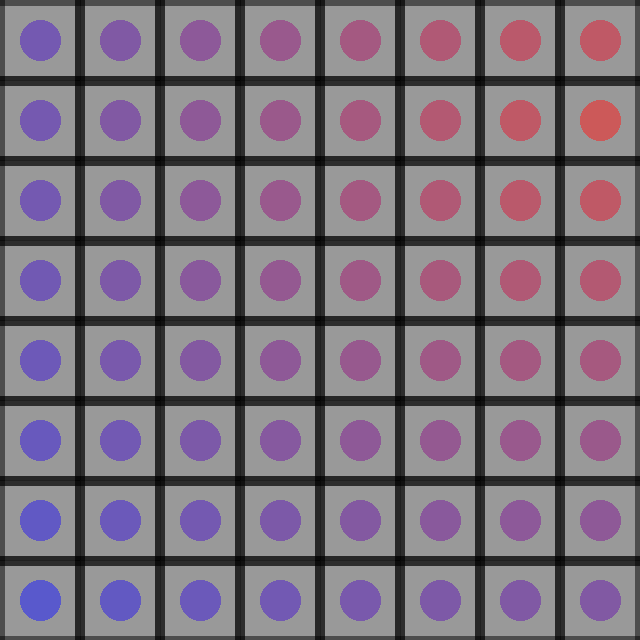

In [3]:
# The model entertained by the subject :
dirac_goal = False
a,b,c,d,e,u = build_maze_model(MAZE_ARRAY,START_IDX,END_IDX,
                               initial_tile_confidence=1.0,dirac_goal=dirac_goal)

#Show the initial model entertained by the subject
model_img = mazeplot(MAZE_ARRAY,START_IDX,END_IDX,
        t=0,
        x_d=None,o_d=None,u_d=None,
        a=a,b=None,c=c,d=None,e=None,
        show_start_and_stop=False)
display(model_img)

Above : The initial model entertained by our agents : 
- **Background :** initial belief about where the "adversive cells" are. The darker the cell, the more the agent believes it "contains" an adversive stimulus. This will evolve across trials through agent learning !
- **Foreground :** Prior preferences of the agents. Bluer cells generate less sought after outcomes and red cells generate outcomes that the agent will look for. Try changing the *dirac_goal* parameter to see how it affects the preferences of the agent !

### b. Explorative behaviour simulations

We can play on our subject initial model to elicit various types of behaviours !

 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-0;2-0])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-1;2-1])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-2;2-2])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-3;2-3])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-4;2-4])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-5;2-5])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-6;2-6])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-7;2-7])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-8;2-8])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-9;2-9])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-10;2-10])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-11;2-11])
 Network [maze] : Timestep 15 / 15
 Done !   -------- (seeds : [240-12;2-12])
 Netwo

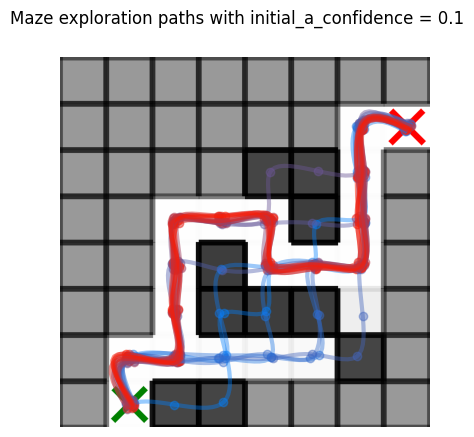

In [4]:
from local_demo_tools.mazex.plot import several_trajectory_learning_plots,all_trajectories_plots

# several_trajectory_learning_plots(MAZE_ARRAY,START_IDX,END_IDX,
#                         dirac_goal=False,alpha=3)

fig = all_trajectories_plots(MAZE_ARRAY,START_IDX,END_IDX,
            Ntrials = 20,T = 15,Th = 5,
            initial_a_confidence = 0.1,
            rs = 2.0,
            la = 2.0,
            dirac_goal=False,
            alpha=4,
            image_size = 640,
            seeds = [240,2])
fig.suptitle("Maze exploration paths with initial_a_confidence = 0.1")
fig.savefig(os.path.join(FIGURES_SAVEPATH,"maze_explor_0.1.png"), dpi=300)

The agent performs initially an exploration of the maze, around the path going to the target. Eventually, it settles for an adequate path avoiding all the aversive tiles ! We can however prompt different behaviours by changing part of the initial agent parameters. 

First, let's explore how uncertainty regarding the maze tileset may prompt novelty-seeking behaviour :

1e-05
None
0.001
None
0.1
None
1.0
None
10.0
None
1000.0
None


C:\Users\annic\AppData\Local\Temp\ipykernel_30472\141586734.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


1e-05
0.001
0.1
1.0
10.0
1000.0


C:\Users\annic\AppData\Local\Temp\ipykernel_30472\141586734.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


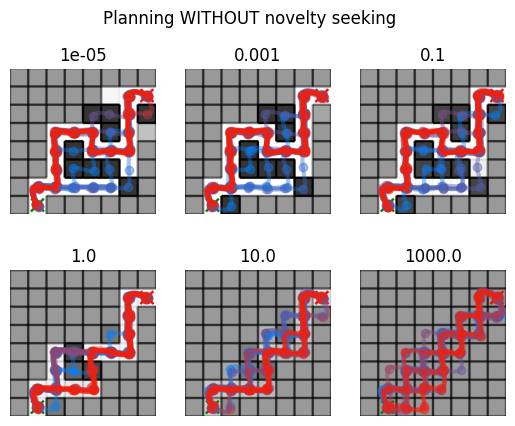

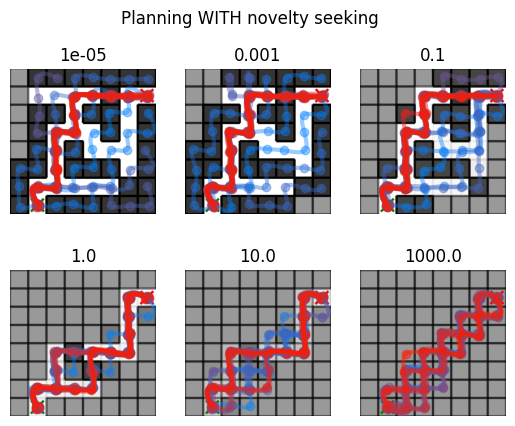

In [6]:
from local_demo_tools.mazex.weights import get_maze_network
from local_demo_tools.mazex.plot import plot_grid_and_trajectories

Ntrials = 20
T = 15
Th = 5
rs = 1.0
la = 2.0
dirac_goal=False
alpha=4
image_size = 64
            
a_confidence_values = np.reshape(np.array([1e-5,1e-3,1e-1,1e0,1e1,1e3]),(2,3))
# a_confidence_values = np.reshape(np.array([1,1,1,100,100,100]),(2,3))
nrows,ncols = a_confidence_values.shape


# Figure 1 : planning doesn't include novelty seeking
fig,axes = plt.subplots(nrows,ncols)
for indx,conf_val in (np.ndenumerate(a_confidence_values)):      
    seeds = np.random.randint(0,9999,(2,)).astype(int) 
    print(conf_val)
    my_network = get_maze_network(MAZE_ARRAY,START_IDX,END_IDX,
                     T,Th,seeds,
                     init_conf=conf_val,rs=rs,la=la,
                     dirac_goal=dirac_goal,alpha=alpha,
                     seek_a_novelty = False)
    stms,weis = my_network.run_N_trials(Ntrials,small_verbose=False,big_verbose=False)
    
    print(stms[0])
    
    state_trajectory = [trial_stm[0].x[0,:] for trial_stm in stms[1:]]
    a = weis[-1][1]["a"]
    
    ax = axes[indx]
    
    # x = np.linspace(0,10,10)
    # ax.plot(x,3*x+6)
    # ax.set_axis_off()
    ax = plot_grid_and_trajectories(ax,MAZE_ARRAY,START_IDX,END_IDX,a,state_trajectory)
    ax.set_title(conf_val)
fig.suptitle("Planning WITHOUT novelty seeking")
fig.show()
fig.savefig(os.path.join(FIGURES_SAVEPATH,"without_novelty_seeking.png"),dpi=300)

# Figure 2 : planning DOES include novelty seeking
fig,axes = plt.subplots(nrows,ncols)
for indx,conf_val in (np.ndenumerate(a_confidence_values)):      
    seeds = np.random.randint(0,9999,(2,)).astype(int) 
    print(conf_val)
    my_network = get_maze_network(MAZE_ARRAY,START_IDX,END_IDX,
                     T,Th,seeds,
                     init_conf=conf_val,rs=rs,la=la,
                     dirac_goal=dirac_goal,alpha=alpha,
                     seek_a_novelty = True)
    stms,weis = my_network.run_N_trials(Ntrials,small_verbose=False,big_verbose=False)
    
    
    
    state_trajectory = [trial_stm[0].x[0,:] for trial_stm in stms[1:]]
    a = weis[-1][1]["a"]
    
    ax = axes[indx]
    
    # x = np.linspace(0,10,10)
    # ax.plot(x,3*x+6)
    # ax.set_axis_off()
    ax = plot_grid_and_trajectories(ax,MAZE_ARRAY,START_IDX,END_IDX,a,state_trajectory)
    ax.set_title(conf_val)
fig.suptitle("Planning WITH novelty seeking")
fig.show()
fig.savefig(os.path.join(FIGURES_SAVEPATH,"with_novelty_seeking.png"),dpi=300)